**Outline:**
 
1. [Libraries and settings](#1-bullet)
2. [Data analyzing](#2-bullet)
3. [Feature Engineering](#3-bullet)


## 1. [Libraries and settings](#1-bullet)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [62]:
file_path = 'E:\C\ICT\Machine Learning and Data Mining\ML-DM-Stock-Price-Prediction\Dataset\VCB.csv'

df = pd.read_csv(file_path)

df['time'] = pd.to_datetime(df['time'], format='%m/%d/%Y')
df.set_index('time', inplace=True)


new_dataset = df[['volume']]
new_dataset.index = df.index

df.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2024-04-26', '2024-05-02', '2024-05-03', '2024-05-06',
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-13', '2024-05-14'],
              dtype='datetime64[ns]', name='time', length=2087, freq=None)

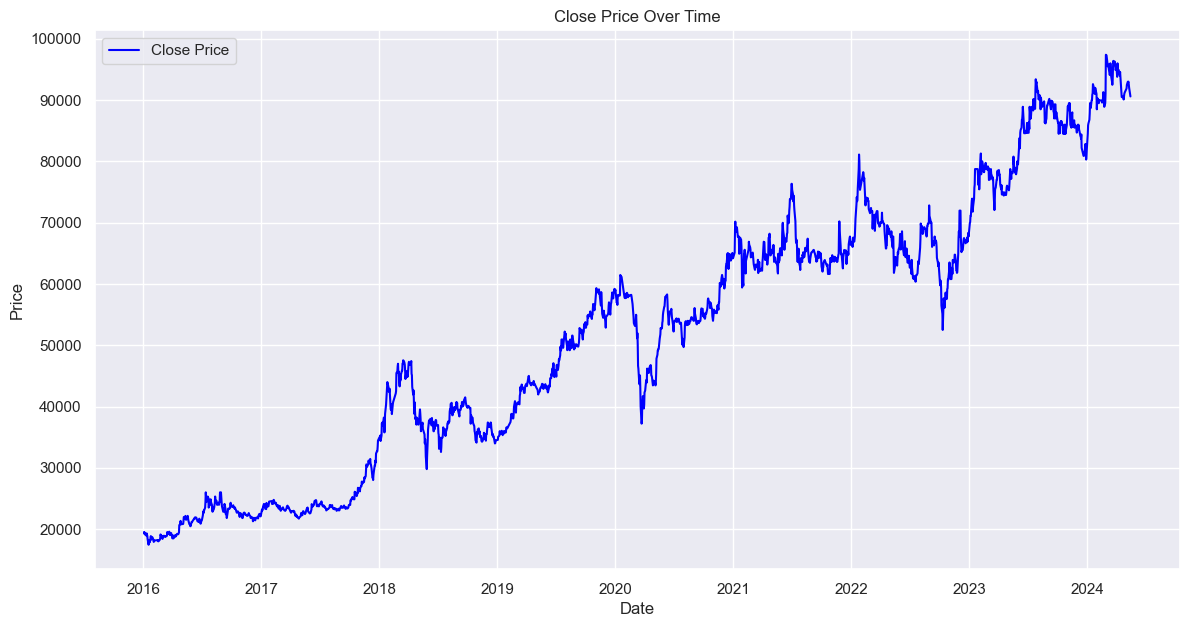

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. [Data analyzing](#2-bullet)



In this section, we analyze various financial indicators including the Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), Money Flow Index (MFI), and Bollinger Bands. We provide definitions, formulas, and the economic significance of these indicators in the context of stock price prediction.



In [64]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
        Unnamed: 0          open           high           low         close  \
count  2087.000000   2087.000000    2087.000000   2087.000000   2087.000000   
mean   1044.000000  51890.532343   52497.945376  51301.346430  51922.216579   
std     602.609326  21749.016438   21942.999081  21527.070392  21753.154649   
min       1.000000  17450.000000   18090.000000  17180.000000  17450.000000   
25%     522.500000  34380.000000   35010.000000  34010.000000  34490.000000   
50%    1044.000000  53990.000000   54510.000000  53600.000000  53990.000000   
75%    1565.500000  66890.000000   67695.000000  65860.000000  66820.000000   
max    2087.000000  98500.000000  100500.000000  97300.000000  97400.000000   

             volume  
count  2.087000e+03  
mean   1.284076e+06  
std    8.286023e+05  
min    9.139000e+04  
25%    7.251700e+05  
50%    1.078600e+06  
75%    1.602435e+06  
max    7.265480e+06  


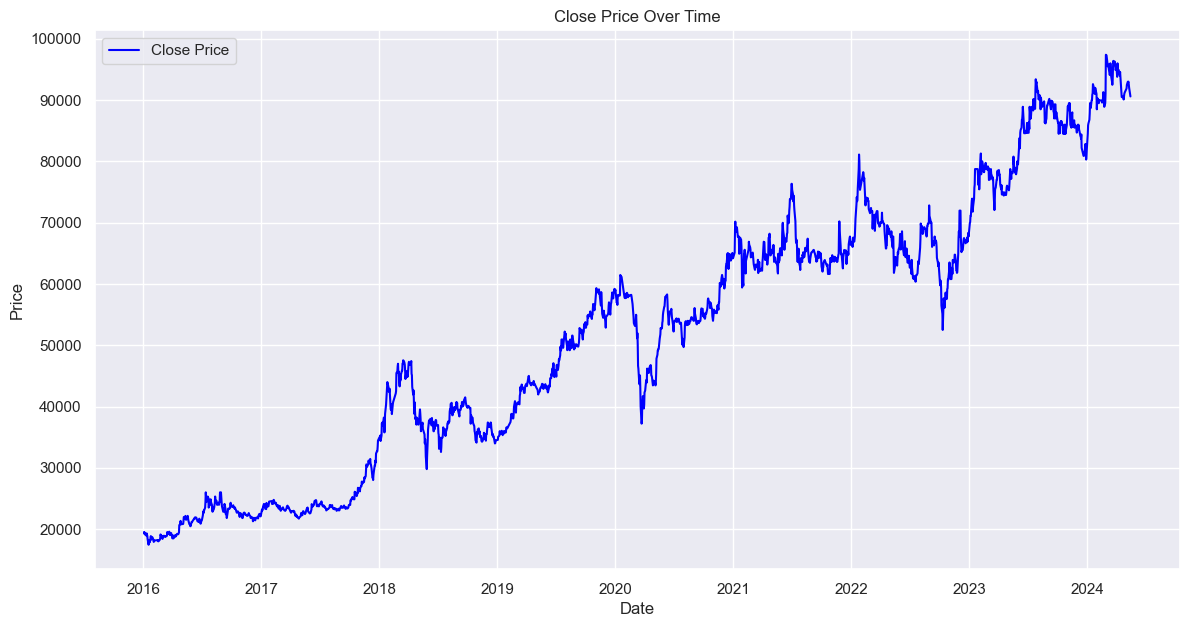

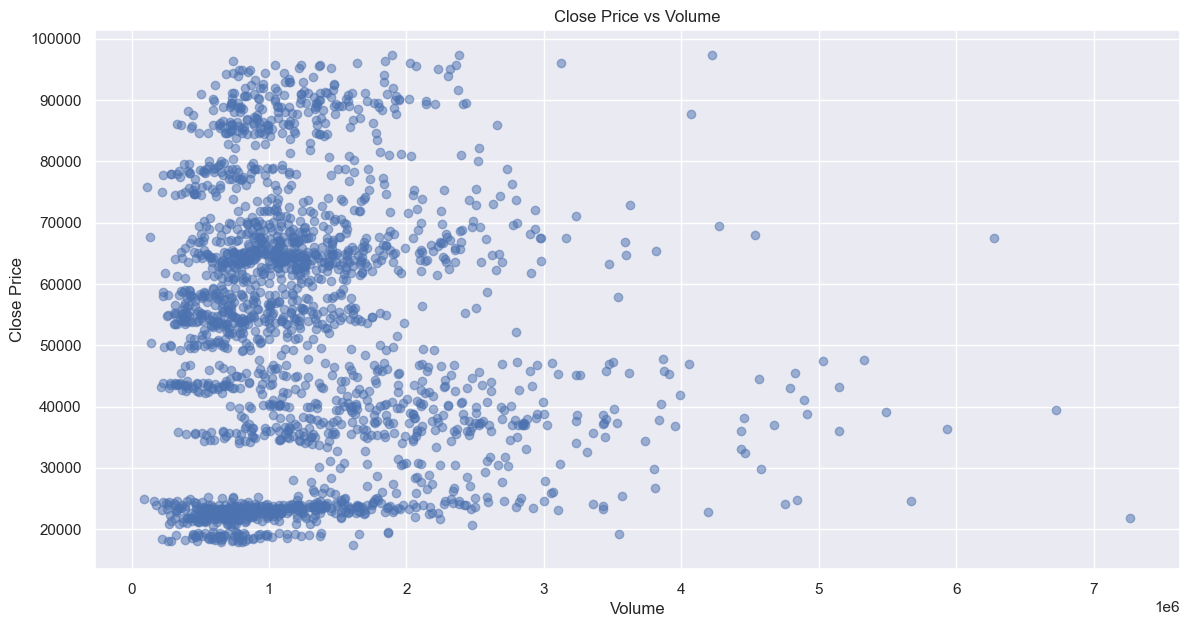

In [65]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Close and volume figure
plt.figure(figsize=(14, 7))
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.title('Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()




### Moving Average (MA) and Exponential Moving Average (EMA)

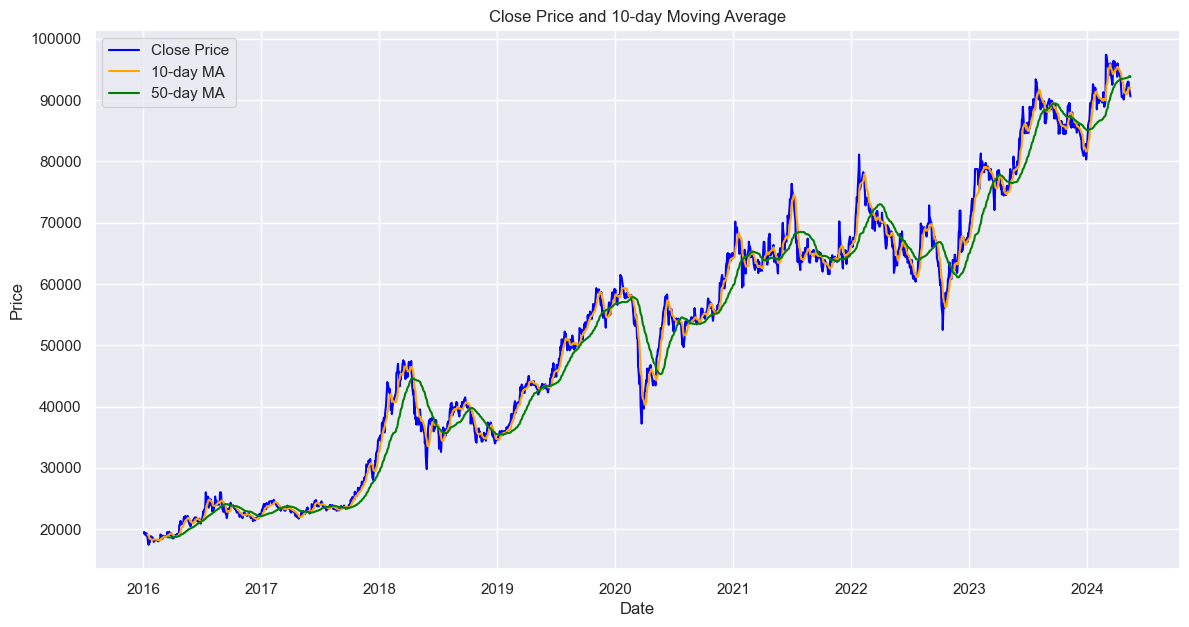

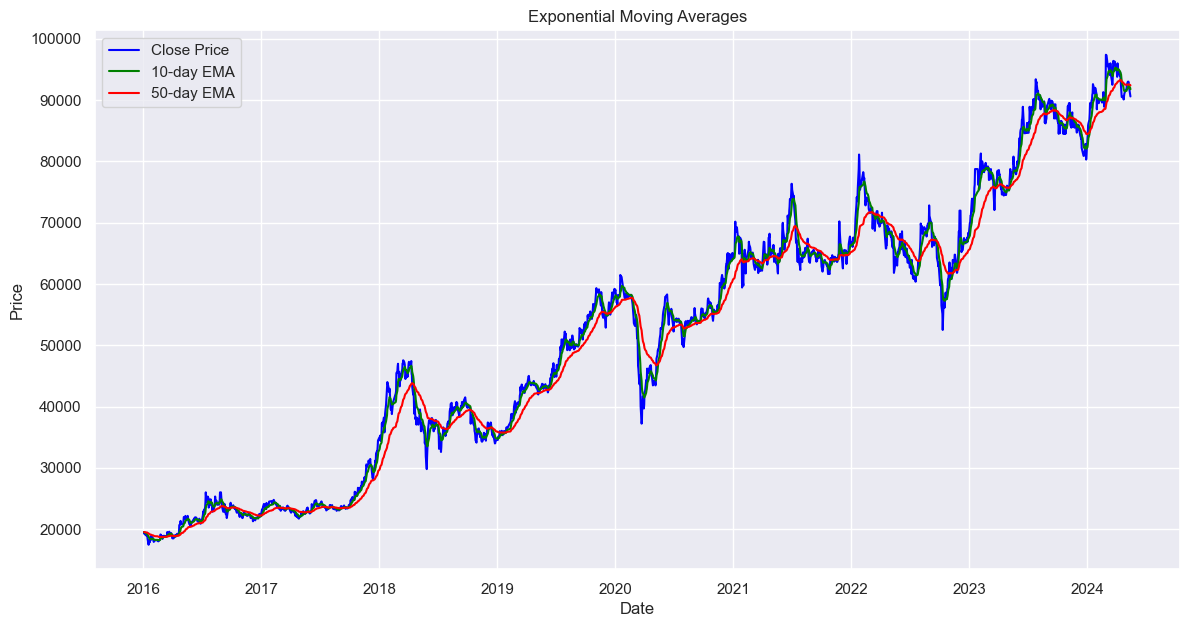

In [66]:
df['MA_10'] = df['close'].rolling(window=10).mean()  # 10-day Moving Average
df['MA_50'] = df['close'].rolling(window=50).mean()

# Biểu đồ MA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.plot(df.index, df['MA_10'], label='10-day MA', color='orange')
plt.plot(df.index, df['MA_50'], label='50-day MA', color='green')
plt.title('Close Price and 10-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Exponential Moving Average (EMA)
df['EMA_10'] = df['close'].ewm(span=10, adjust=False).mean()
df['EMA_50'] = df['close'].ewm(span=50, adjust=False).mean()

# Biểu đồ EMA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.plot(df.index, df['EMA_10'], label='10-day EMA', color='green')
plt.plot(df.index, df['EMA_50'], label='50-day EMA', color='red')
plt.title('Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()





### Relative Strength Index (RSI)

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. It is calculated using the formula:

$$  \text{RSI} = 100 - \frac{100}{1 + \text{RS}}  $$

where $$ \text{RS} = \frac{\text{Average gain over a period}}{\text{Average loss over a period}} $$

In economic terms, RSI is used to identify overbought or oversold conditions in a market. An RSI above 70 typically indicates that a stock is overbought, while an RSI below 30 suggests that it is oversold.


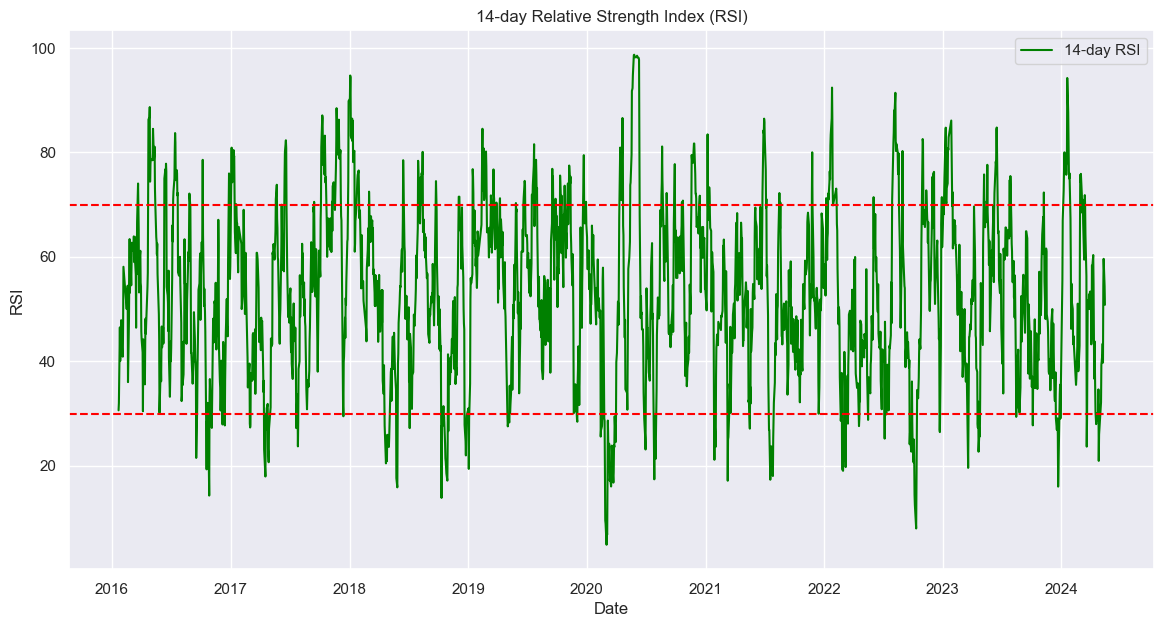

In [67]:

def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df['close'], 14)  # 14-day RSI

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['RSI_14'], label='14-day RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--')
plt.axhline(y=30, color='red', linestyle='--')
plt.title('14-day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()




### Moving Average Convergence Divergence (MACD)

The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. It is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA:
 
$$
\text{MACD} = \text{EMA}_{12} - \text{EMA}_{26}
$$

A signal line (9-day EMA of the MACD) is then plotted on top of the MACD to function as a trigger for buy and sell signals.

MACD is significant in economics as it helps traders understand whether the bullish or bearish momentum in the price is strengthening or weakening.


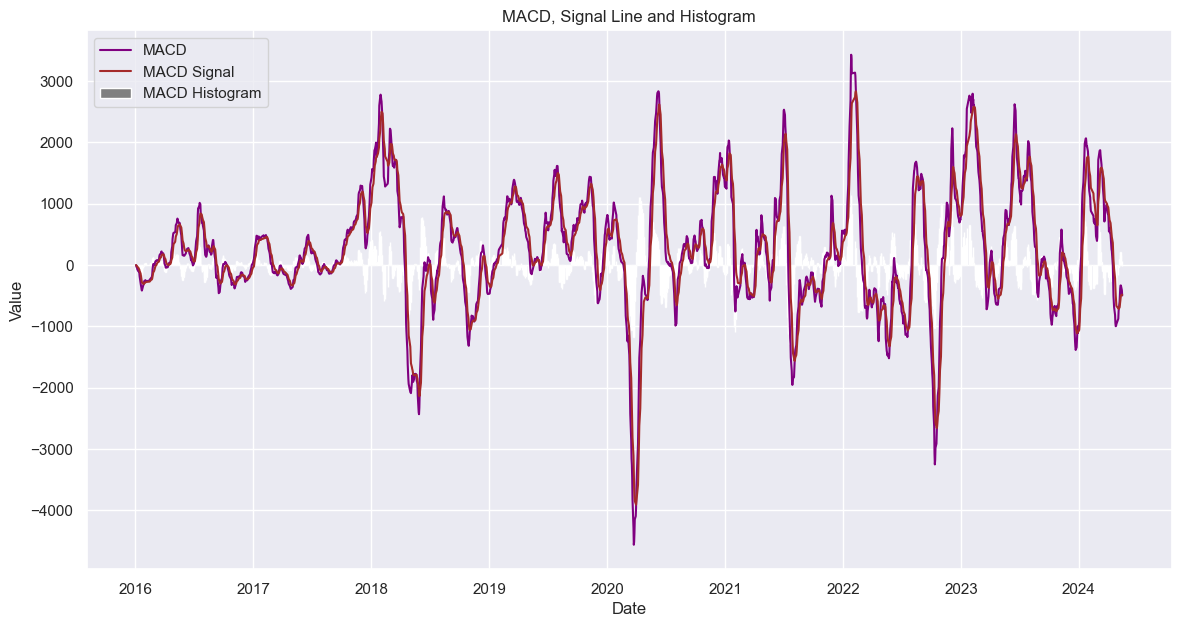

In [68]:

short_window = 12
long_window = 26
signal_window = 9

df['EMA_12'] = df['close'].ewm(span=short_window, adjust=False).mean()
df['EMA_26'] = df['close'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['MACD'], label='MACD', color='purple')
plt.plot(df.index, df['MACD_Signal'], label='MACD Signal', color='brown')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey')
plt.title('MACD, Signal Line and Histogram')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()




### Bollinger Bands

Bollinger Bands consist of a middle band being a simple moving average (SMA) and two outer bands (upper and lower) which are standard deviations away from the middle band. They are calculated as follows:


$$ \text{Upper Band} = \text{SMA}(n) + k \times \sigma $$



$$ \text{Lower Band} = \text{SMA}(n) - k \times \sigma $$


where n is the number of periods, k is the number of standard deviations, and \sigma is the standard deviation.

Bollinger Bands are significant in economics as they provide a relative definition of high and low prices of a market, helping traders to identify overbought or oversold conditions.


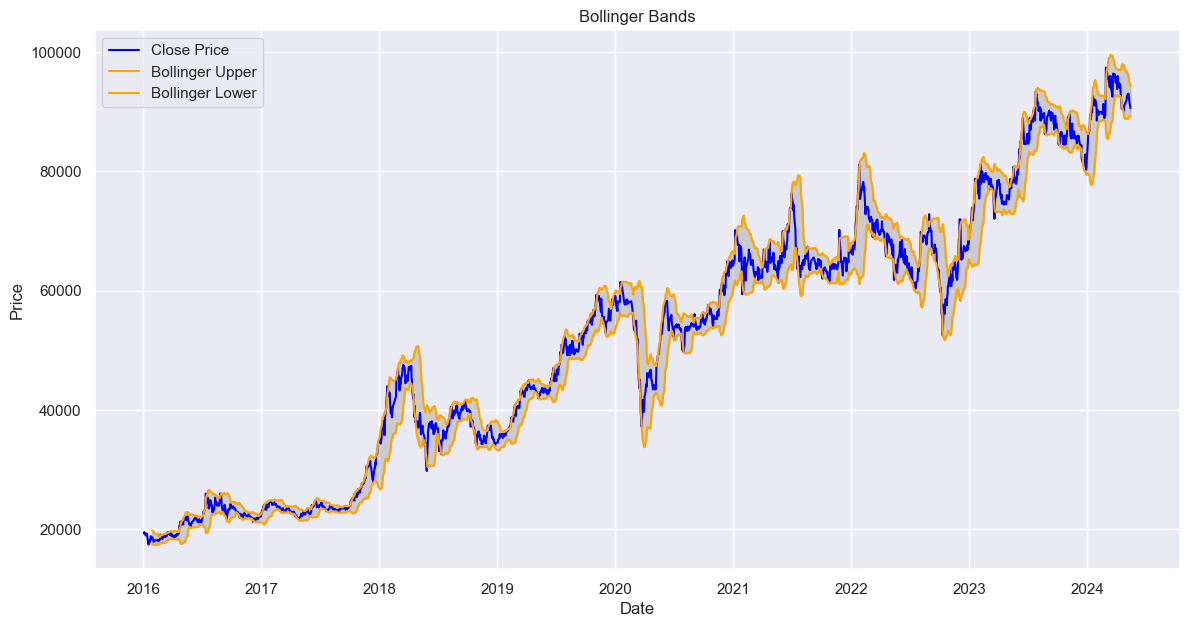

In [69]:
# Log-return
df['Log_Return'] = np.log(df['close'] / df['close'].shift(1))

# Rolling mean and rolling standard deviation
df['Rolling_Mean_20'] = df['close'].rolling(window=20).mean()
df['Rolling_Std_20'] = df['close'].rolling(window=20).std()


df['Bollinger_Upper'] = df['Rolling_Mean_20'] + (df['Rolling_Std_20'] * 2)
df['Bollinger_Lower'] = df['Rolling_Mean_20'] - (df['Rolling_Std_20'] * 2)


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.plot(df.index, df['Bollinger_Upper'], label='Bollinger Upper', color='orange')
plt.plot(df.index, df['Bollinger_Lower'], label='Bollinger Lower', color='orange')
plt.fill_between(df.index, df['Bollinger_Upper'], df['Bollinger_Lower'], color='grey', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 3. [Feature Engineering](#3-bullet)

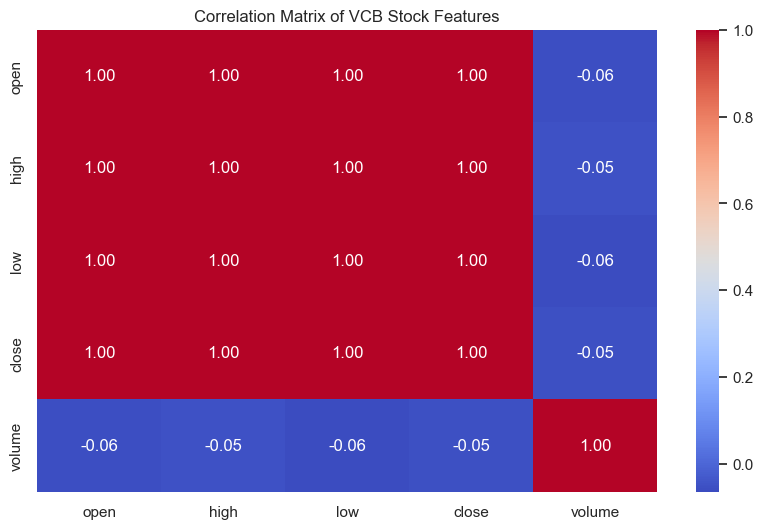

In [70]:
df = pd.read_csv(file_path)


correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of VCB Stock Features')
plt.show()